  ## Flight Price Prediction 


## Problem Statement
Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travelers saying that flight ticket prices are so unpredictable. As data scientists, we are gonna prove that given the right data anything can be predicted. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities. Size of training set: 10683 records

## Data Definition

Airline: The name of the airline.

Date_of_Journey: The date of the journey

Source: The source from which the service begins.

Destination: The destination where the service ends.

Route: The route taken by the flight to reach the destination.

Dep_Time: The time when the journey starts from the source.

Arrival_Time: Time of arrival at the destination.

Duration: Total duration of the flight.

Total_Stops: Total stops between the source and destination.

Additional_Info: Additional information about the flight

Price: The price of the ticket

## Table of Contents

1. **[Import Libraries](#import_lib)**
1. **[Loading_&_Reading_Data](#load_read_data)**
1. **[Analize and Prepare the Data](#PREPARE_AND_ANALIZE_THE_DATA)**
1. **[Model_Building](#Models)**
1. **[Hypertunning the Model](#Hypertunning)**

<a id='import_lib'></a>
# Import Library

In [1]:
# Impoting Librares

# Pandas and Numpy
import pandas as pd
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# Data visualization library
import matplotlib.pyplot as plt
import seaborn as sns 

# suppress the warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# Label Encoding
from sklearn.preprocessing import LabelEncoder

<a id='load_read_data'></a>
## Loading & Reading Data

In [2]:
# Loading and Reading the Data

# Extracting Data using read_excel as the file is in eccel i.e xlsx format

df_flight=pd.read_excel("C:/Users/Harshad/Downloads/Data_Train.xlsx")
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Dimensions of  the Data
df_flight.shape

(10683, 11)

In [4]:
# Information of data
df_flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Detail Describtion of data
df_flight.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
# Counts for No of Airlines
df_flight.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [7]:
# Counts for Duration column
df_flight.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
# Checking the data type
df_flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
# Finding Misssing Values 
df_flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

We observe 2 missing values,I can directly drop these,as these are very less

In [10]:
# Treating Missing Values
df_flight.dropna(inplace=True)

In [11]:
# Checkng 
df_flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<a id='PREPARE_AND_ANALIZE_THE_DATA'></a>
## PREPARE  AND  ANALIZE THE DATA

## Understanding the Data

  **Visualization of numeric variables**

In [12]:
# Checking numeric variables
df_numeric_features = df_flight.select_dtypes(include=np.number)
df_numeric_features.columns

Index(['Price'], dtype='object')

There is only one numeric variable

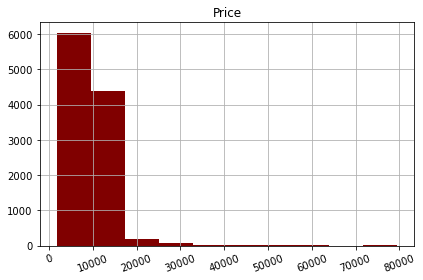

In [13]:
# Visualization of that Variable
df_numeric_features.hist(xrot = 20, color = "maroon")
plt.tight_layout()
plt.show()  
plt.rcParams['figure.figsize'] = [10,5]

**Visualization of Categorical Columns**

In [14]:
cat_vars = df_flight.dtypes[df_flight.dtypes == 'object'].index

cat_vars = [ x for x in cat_vars]
cat_vars

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [15]:
df_cat_features = df_flight.select_dtypes(include='object')

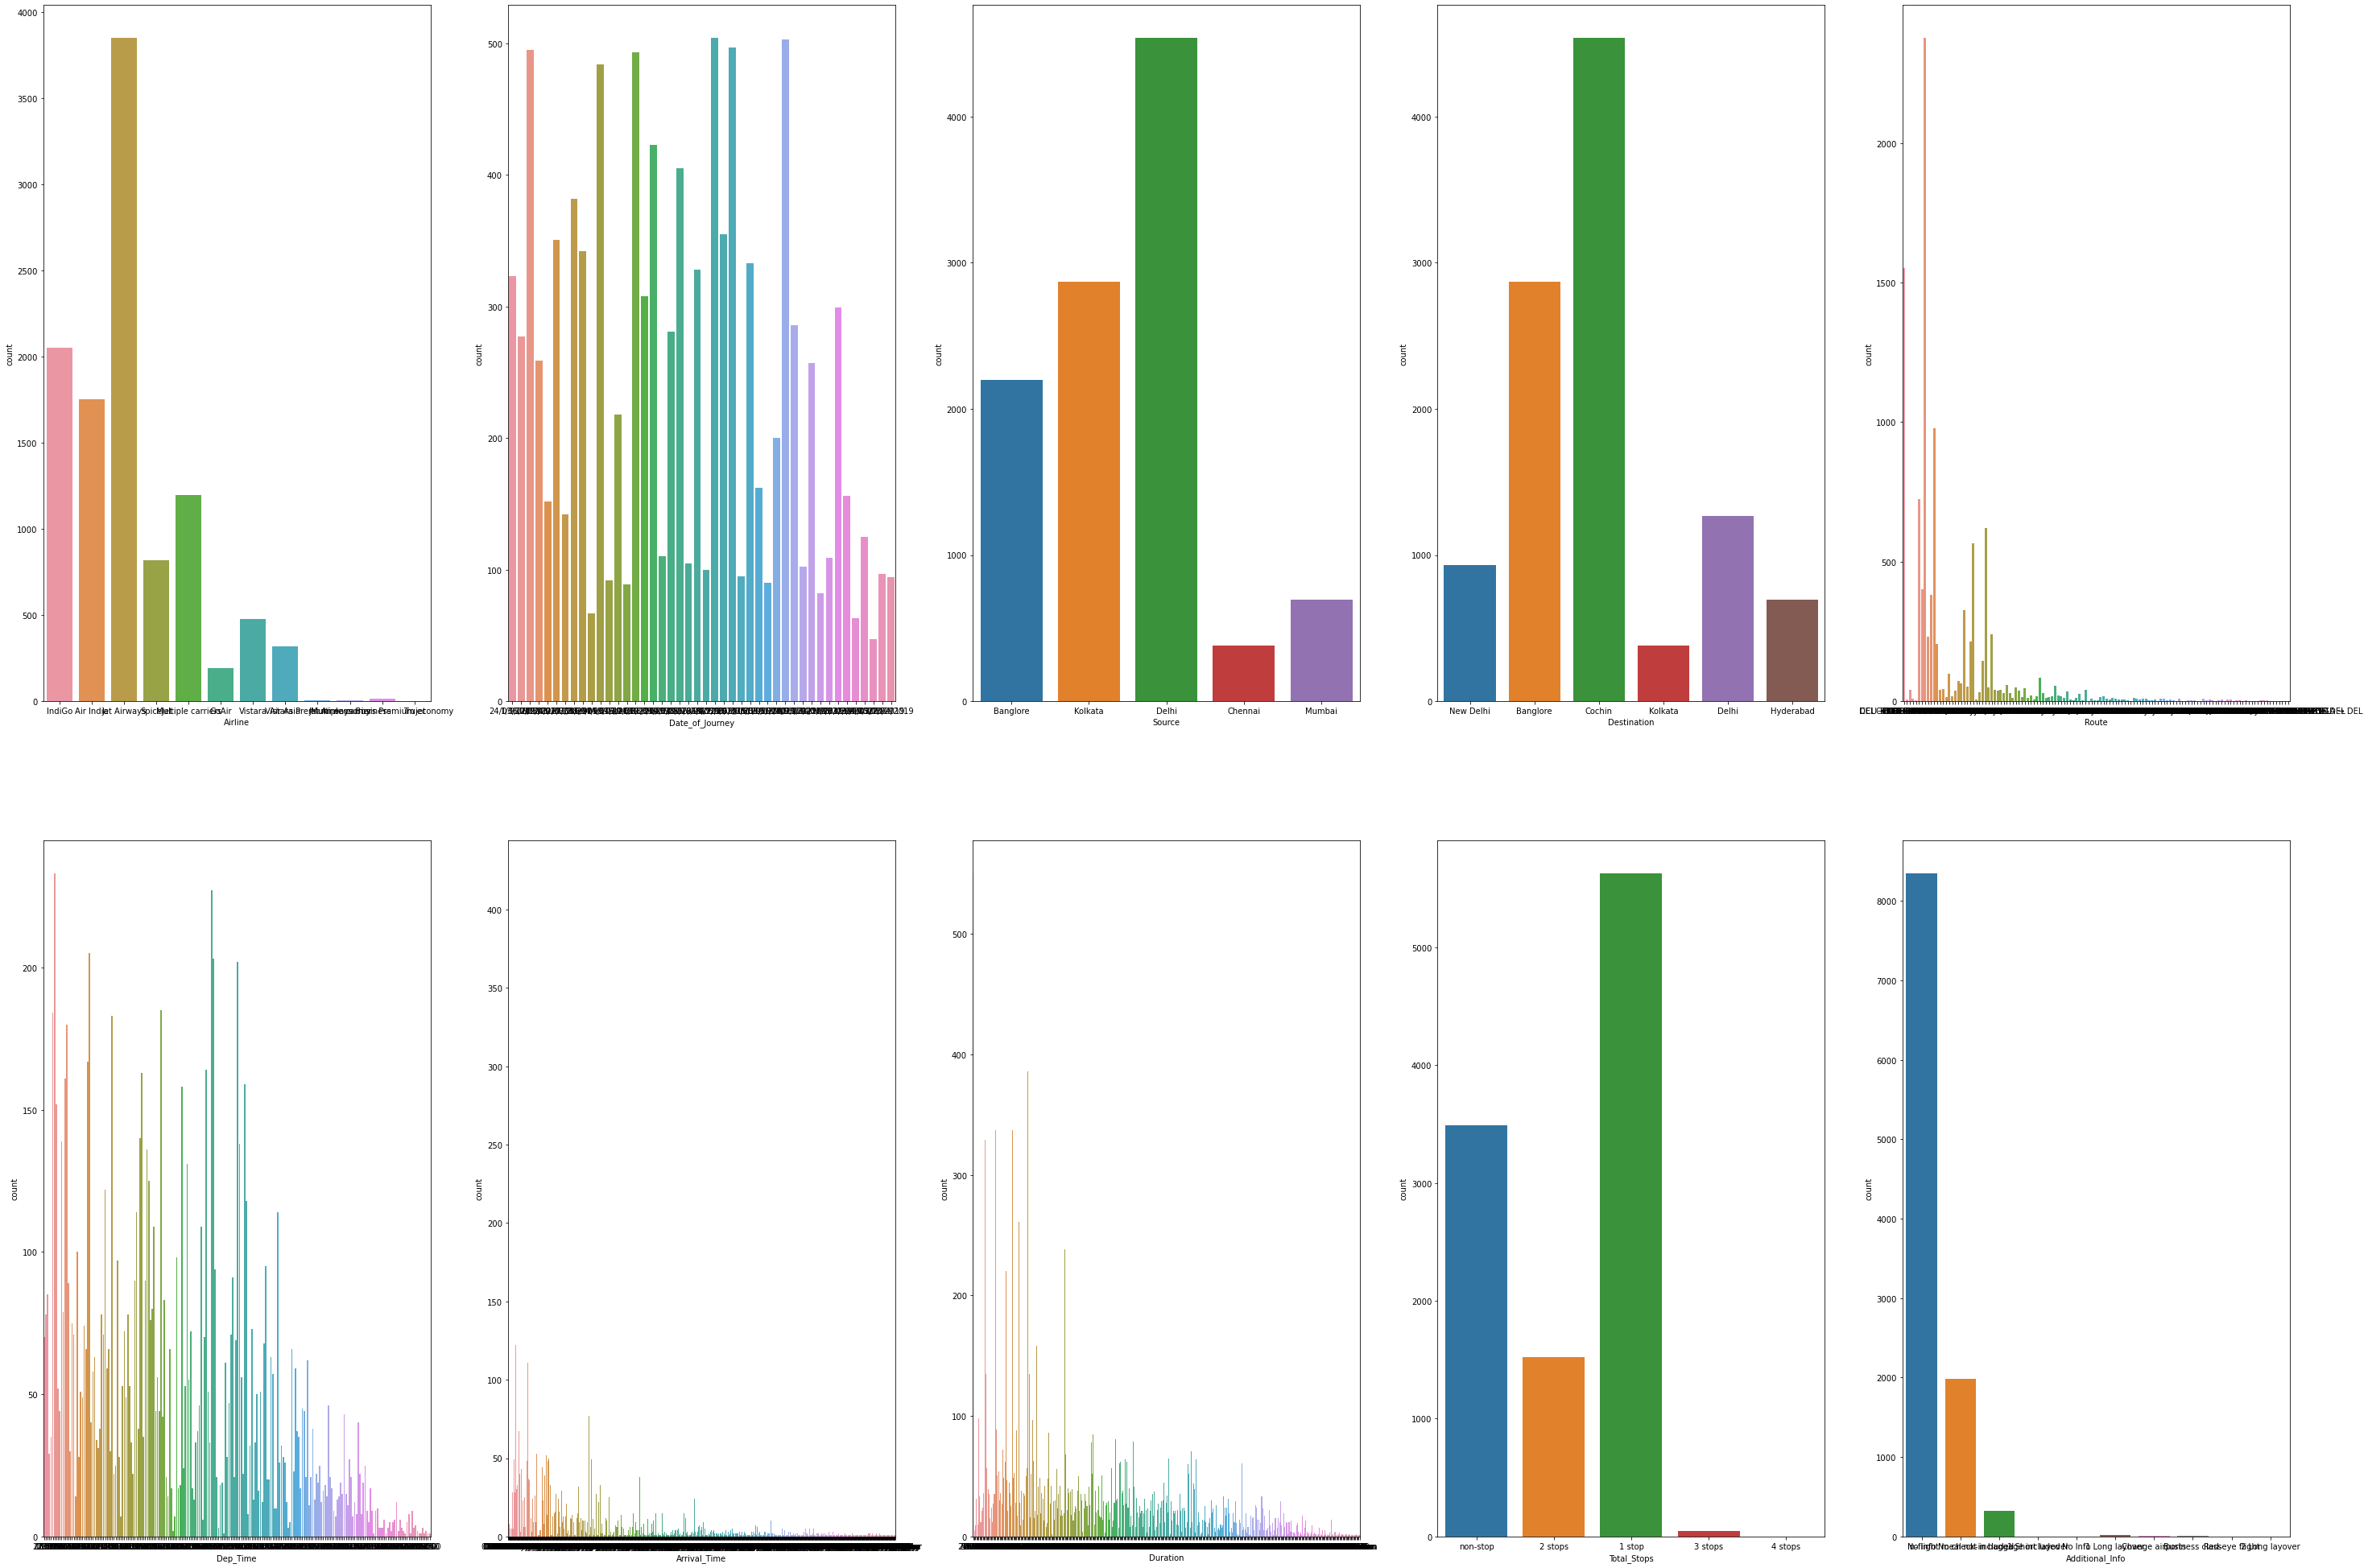

In [16]:

from pandas.api.types import is_string_dtype

# create an empty list to store all the categorical variables
categorical=[]

# check the data type of each variable
for column in df_flight:

    # check if the variable has the categorical type 
    if is_string_dtype(df_flight[column]):
        
        # append the categorical variables to the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows=2, ncols=5, figsize = (50, 35))

# plot the count plot using countplot() for each categorical variable
for variable, subplot in zip(cat_vars, ax.flatten()):
    sns.countplot(x=df_flight[variable], ax = subplot)
    
# display the plot
plt.show()

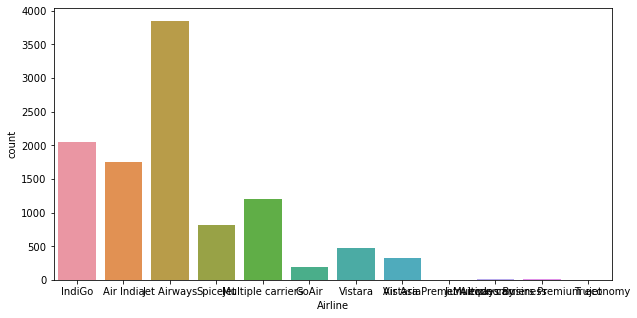

In [17]:
# Visualization of which company has captured more Market

sns.countplot(x ='Airline', data = df_flight)
plt.show()
plt.rcParams['figure.figsize'] = [30,25]

we see that Customers prefer more Jet Airways Airline continued by IndiGo.

**Visualize the target variable**

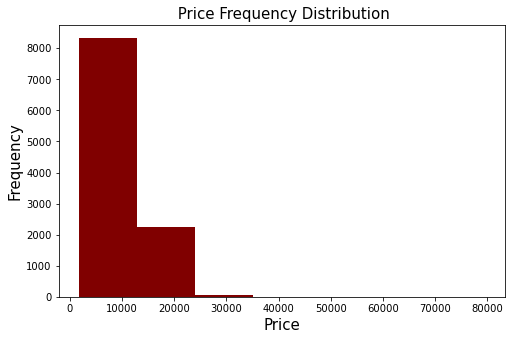

In [18]:
# set the xlabel and the fontsize
plt.figure(figsize=(8,5))
plt.xlabel("Price", fontsize=15)

# set the ylabel and the fontsize
plt.ylabel("Frequency", fontsize=15)

# set the title of the plot
plt.title(" Price Frequency Distribution", fontsize=15)

# plot the histogram for the target variable
plt.hist(df_flight["Price"], color = 'maroon',bins=7)
plt.show()

**Boxplot of Airline and Price**

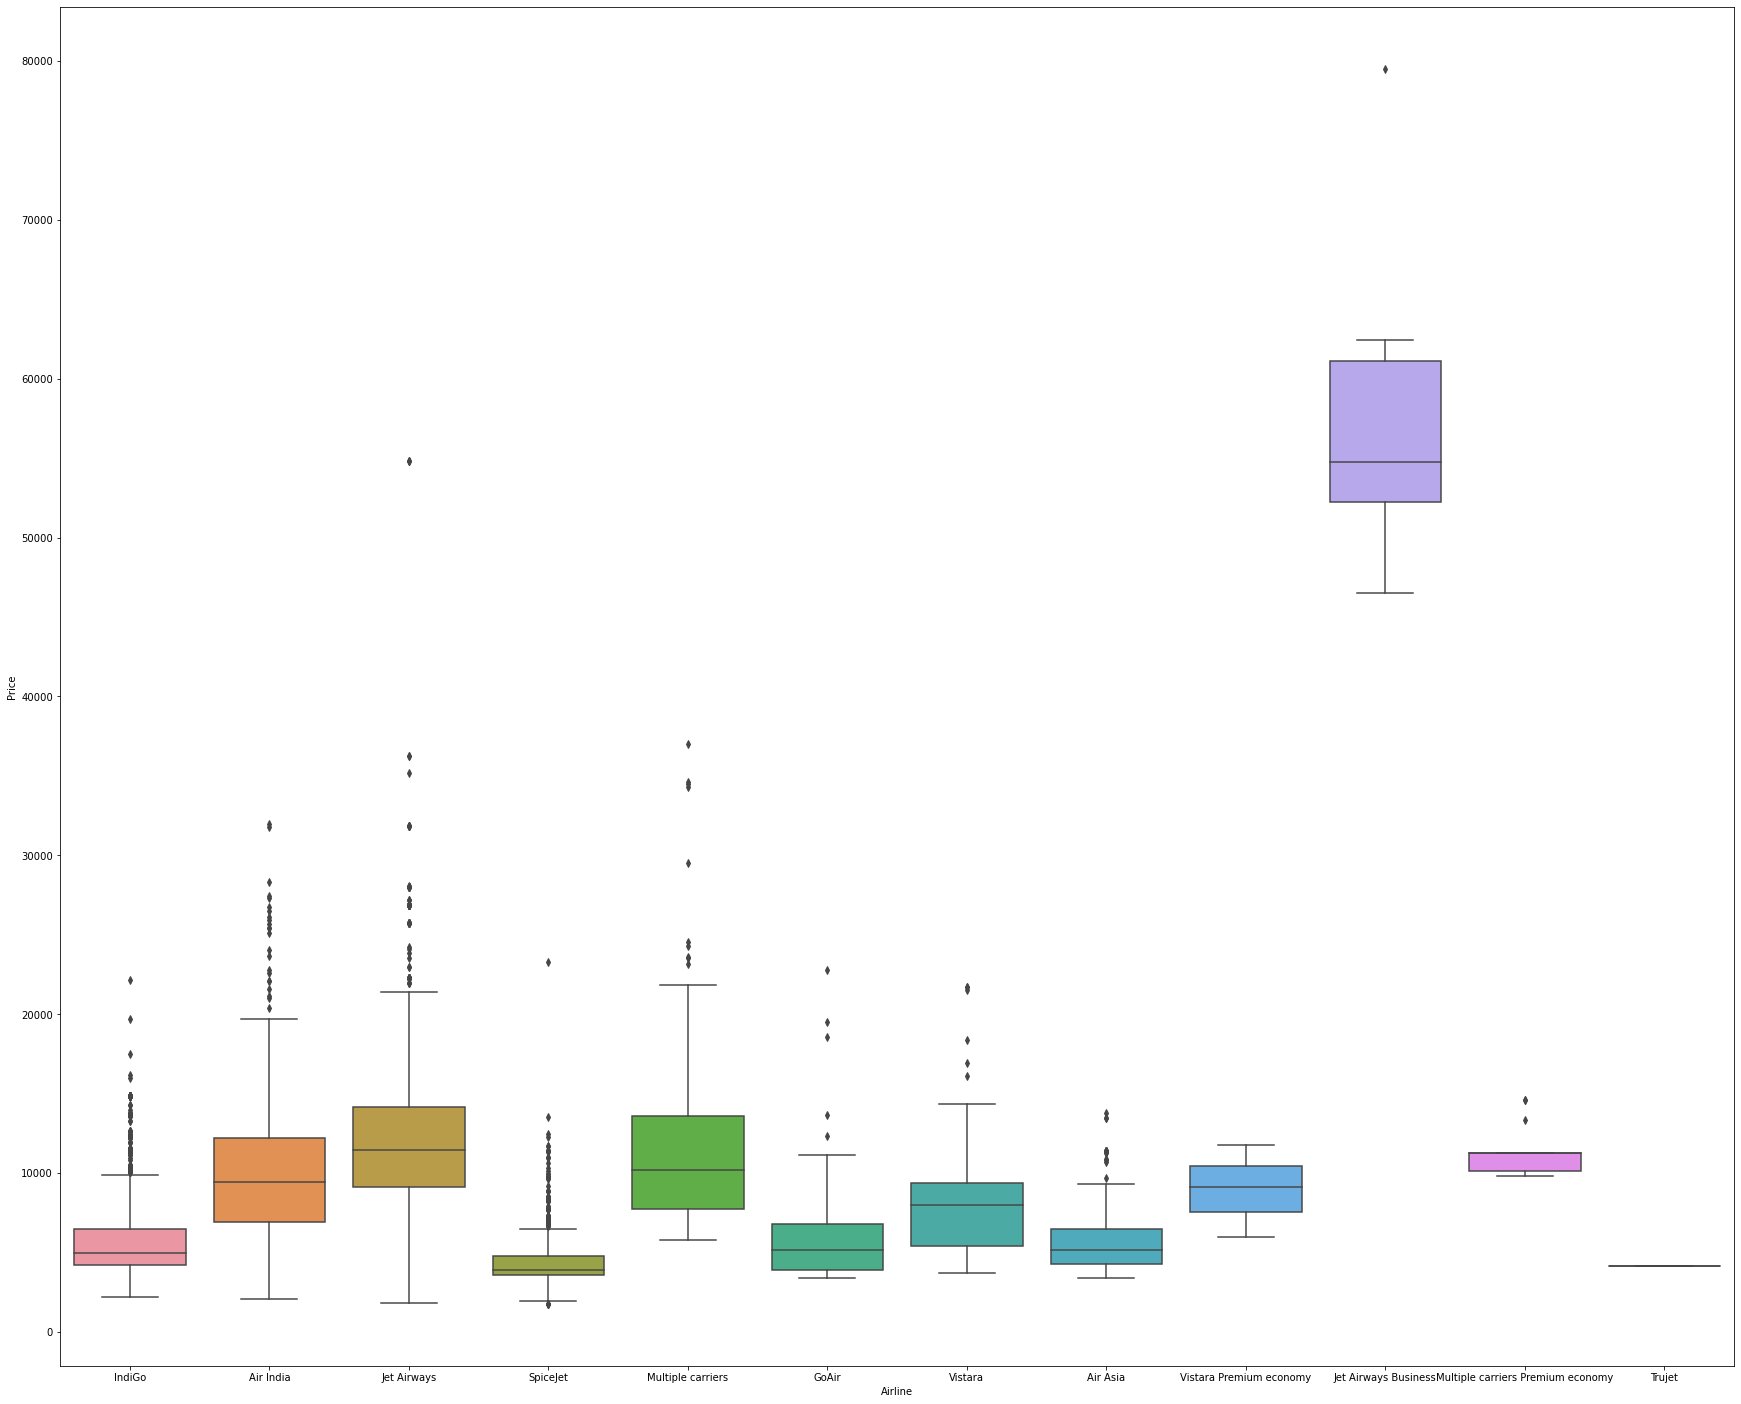

In [19]:
# draw the boxplot for Airline and Price
sns.boxplot(y="Price", x="Airline", data= df_flight)
plt.show()

**Exploratory Data Analysis** 

## DATA CLEANING

In [20]:
# Checking the datatype
df_flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.

dt.day method will extract only day of that date

dt.month method will extract only month of that date

In [21]:
def change_into_datetime(col):
    df_flight[col]=pd.to_datetime(df_flight[col])

In [22]:
df_flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [23]:
for i in ('Date_of_Journey','Dep_Time','Arrival_Time'):
    change_into_datetime(i)

In [24]:
df_flight.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [25]:
df_flight['journey_day']=df_flight['Date_of_Journey'].dt.day
df_flight['journey_month']=df_flight['Date_of_Journey'].dt.month

In [26]:
df_flight.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-12-19 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-12-19 05:50:00,2022-12-19 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-12-19 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-12-19 18:05:00,2022-12-19 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-12-19 16:50:00,2022-12-19 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [27]:
df_flight.drop('Date_of_Journey',inplace=True,axis=1)

From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns

In [28]:
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute

In [29]:
extract_hour(df_flight,'Dep_Time')
extract_hour(df_flight,'Arrival_Time')
extract_min(df_flight,'Dep_Time')
extract_min(df_flight,'Arrival_Time')

In [30]:
df_flight.drop('Dep_Time',axis=1,inplace=True)

In [31]:
df_flight.drop('Arrival_Time',axis=1,inplace=True)

In [32]:
df_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [33]:
duration = list(df_flight['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m'
        else:
            duration[i]='0h '+ duration[i]

In [34]:
df_flight['Duration']=duration

In [35]:
df_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35


In [36]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[0][0:-1]

In [37]:
df_flight['dur_hour']=df_flight['Duration'].apply(hour)

In [38]:
df_flight['dur_min']=df_flight['Duration'].apply(minutes)

In [39]:
df_flight.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,dur_hour,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,1,20,10,2,2
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,13,50,15,7,7
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,4,25,25,19,19
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,23,5,30,5,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,21,50,35,4,4


In [40]:
df_flight.drop('Duration',axis=1,inplace=True)

In [41]:
df_flight.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Arrival_Time_hour     int64
Dep_Time_min          int64
Arrival_Time_min      int64
dur_hour             object
dur_min              object
dtype: object

In [42]:
df_flight['dur_hour'] = df_flight['dur_hour'].astype(int)
df_flight['dur_min'] = df_flight['dur_min'].astype(int)

In [43]:
df_flight.dtypes

Airline              object
Source               object
Destination          object
Route                object
Total_Stops          object
Additional_Info      object
Price                 int64
journey_day           int64
journey_month         int64
Dep_Time_hour         int64
Arrival_Time_hour     int64
Dep_Time_min          int64
Arrival_Time_min      int64
dur_hour              int32
dur_min               int32
dtype: object

Finding the categorical value

In [44]:
column=[column for column in df_flight.columns if df_flight[column].dtype=='object']
column

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

Finding the continuous value

In [45]:
continuous_col =[column for column in df_flight.columns if df_flight[column].dtype!='object']
continuous_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Arrival_Time_hour',
 'Dep_Time_min',
 'Arrival_Time_min',
 'dur_hour',
 'dur_min']

**Handling categorical data**

We are using two main Encoding Techniques to covert Categorical data into some numerical format

Nominal data -- Data that are not in any order -->one hot encoding

ordinal data -- Data are in order --> labelEncode

In [46]:
categorical = df_flight[column]

In [47]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [48]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [49]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [50]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [51]:
# Now Source variable
categorical['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [52]:
# Performing Onehot Encoding
Source = pd.get_dummies(df_flight['Source'],drop_first=True)

In [53]:
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [54]:
# Now  Destination variable
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [55]:
Destination = pd.get_dummies(df_flight['Destination'],drop_first=True)

In [56]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [57]:
# now work on route column
categorical['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [58]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [59]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,BLR,NAG,DEL,NaN,NaN


In [60]:
categorical.Route5.isnull().sum()

10636

In [61]:
df_flight.drop('Route',axis=1,inplace=True)

In [62]:
categorical.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Route1                 0
Route2                 0
Route3              3491
Route4              9116
Route5             10636
dtype: int64

In [63]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i].fillna('None',inplace=True)

In [64]:
categorical.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Route1             0
Route2             0
Route3             0
Route4             0
Route5             0
dtype: int64

<AxesSubplot:xlabel='Arrival_Time_hour', ylabel='Price'>

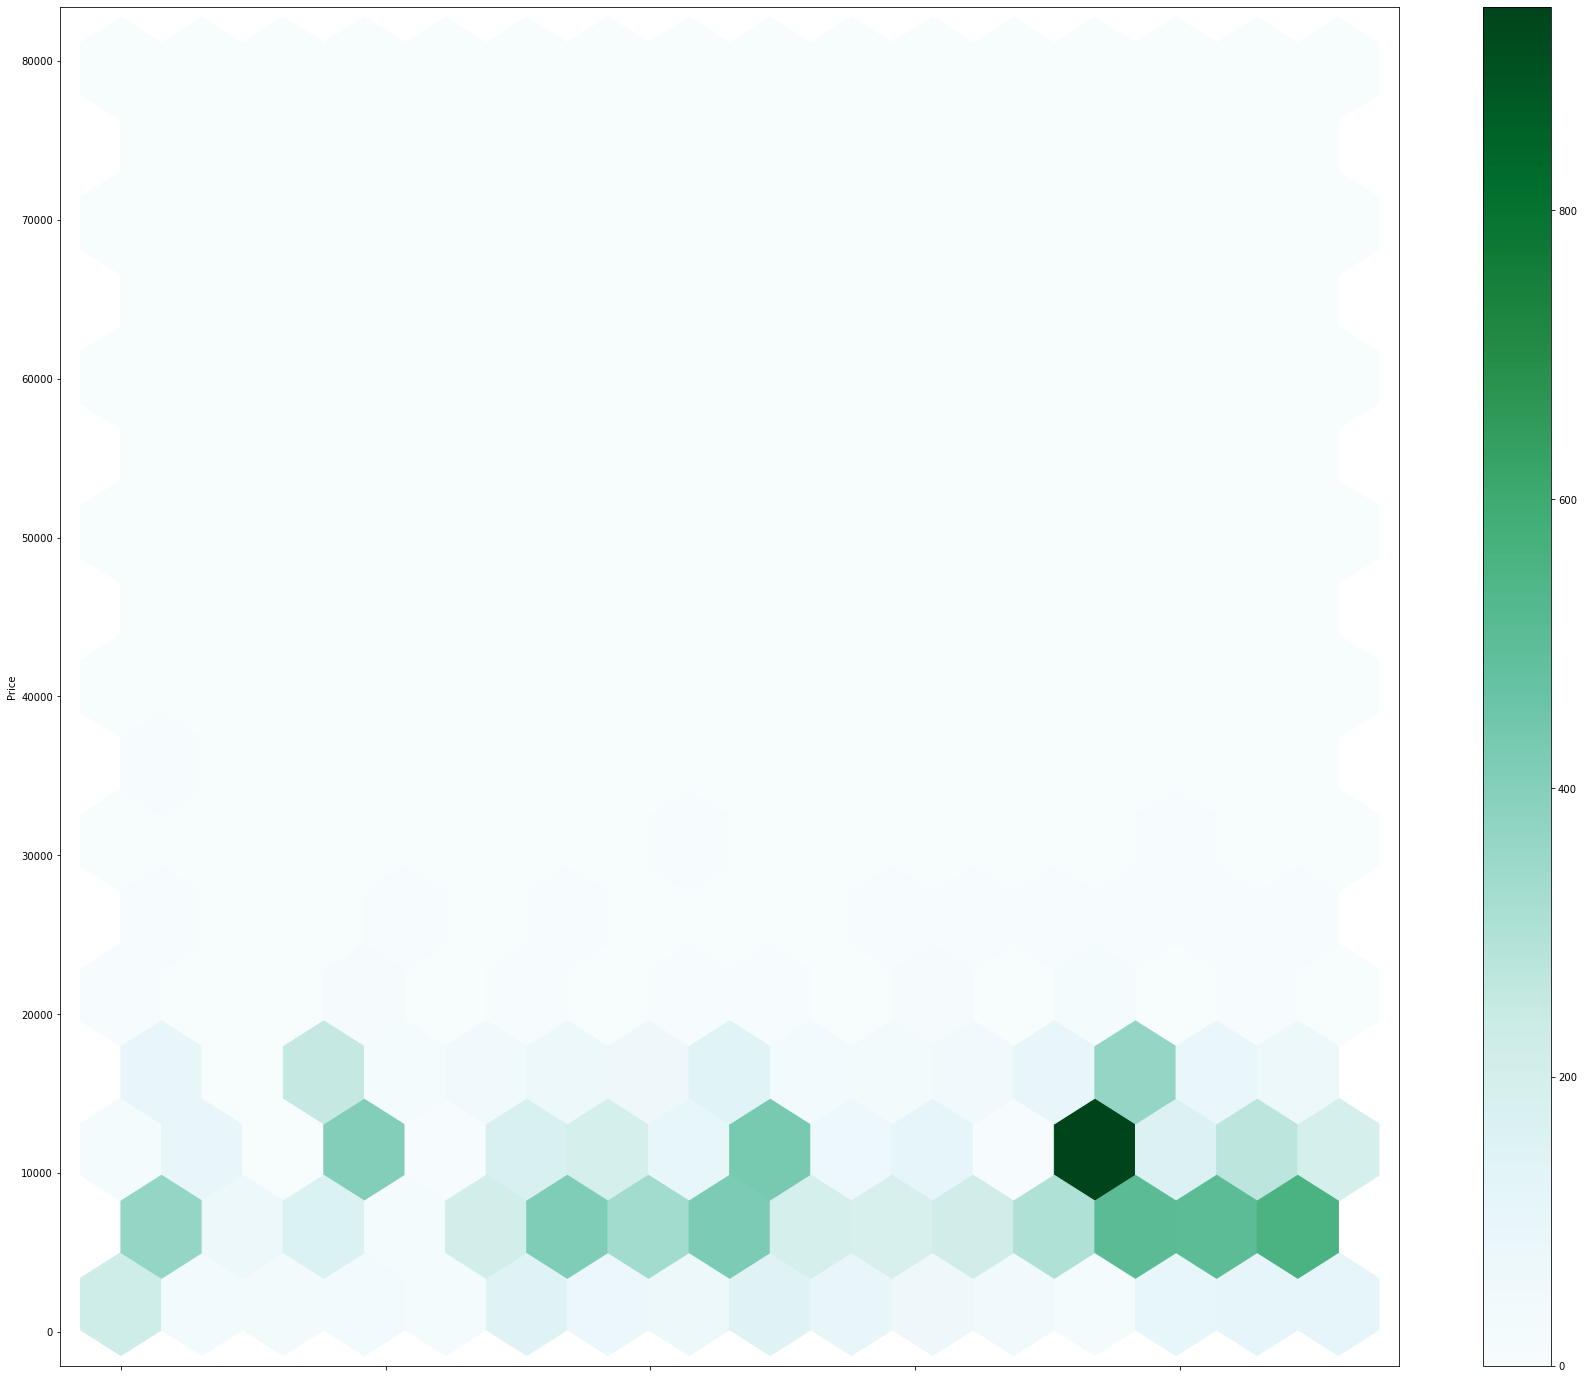

In [65]:
df_flight.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [66]:
# Apply Label Encoder
encoder=LabelEncoder()

In [67]:
for i in ['Route1','Route2','Route3','Route4','Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [68]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Route1,Route2,Route3,Route4,Route5
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0,13,29,13,5
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,2,25,1,3,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,3,32,4,5,5
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,2,34,3,13,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,0,34,8,13,5


In [69]:
# Dropping Unwanted Column
df_flight.drop('Additional_Info',inplace=True,axis=1)

In [70]:
categorical['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [71]:
# encoding Total stops

dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [72]:
categorical['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [73]:
df_flight.drop('Source',axis=1,inplace=True)
df_flight.drop('Destination',axis=1,inplace=True)
df_flight.drop('Airline',axis=1,inplace=True)

In [74]:
df_flight.head()

,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,dur_hour,dur_min
0,non-stop,3897,24,3,22,1,20,10,2,2
1,2 stops,7662,5,1,5,13,50,15,7,7
2,2 stops,13882,6,9,9,4,25,25,19,19
3,1 stop,6218,5,12,18,23,5,30,5,5
4,1 stop,13302,3,1,16,21,50,35,4,4


## After all preprocessing, Our data is ready for the modeling

In [75]:
final_df=pd.concat([categorical,Airline,Source,Destination,df_flight[continuous_col]],axis=1)


In [76]:
final_df.drop(['Airline','Source','Destination','Route','Additional_Info'],inplace=True,axis=1)

In [77]:
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,...,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,...,1,3897,24,3,22,1,20,10,2,2
1,2,2,25,1,3,5,1,0,0,0,...,0,7662,5,1,5,13,50,15,7,7
2,2,3,32,4,5,5,0,0,0,1,...,0,13882,6,9,9,4,25,25,19,19
3,1,2,34,3,13,5,0,0,1,0,...,0,6218,5,12,18,23,5,30,5,5
4,1,0,34,8,13,5,0,0,1,0,...,1,13302,3,1,16,21,50,35,4,4


In [78]:
pd.set_option('display.max_columns',33)
final_df.head()

,Total_Stops,Route1,Route2,Route3,Route4,Route5,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_hour,Dep_Time_min,Arrival_Time_min,dur_hour,dur_min
0,0,0,13,29,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,3897,24,3,22,1,20,10,2,2
1,2,2,25,1,3,5,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,7662,5,1,5,13,50,15,7,7
2,2,3,32,4,5,5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,13882,6,9,9,4,25,25,19,19
3,1,2,34,3,13,5,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,6218,5,12,18,23,5,30,5,5
4,1,0,34,8,13,5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,13302,3,1,16,21,50,35,4,4


## Check For Outliers

In [79]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

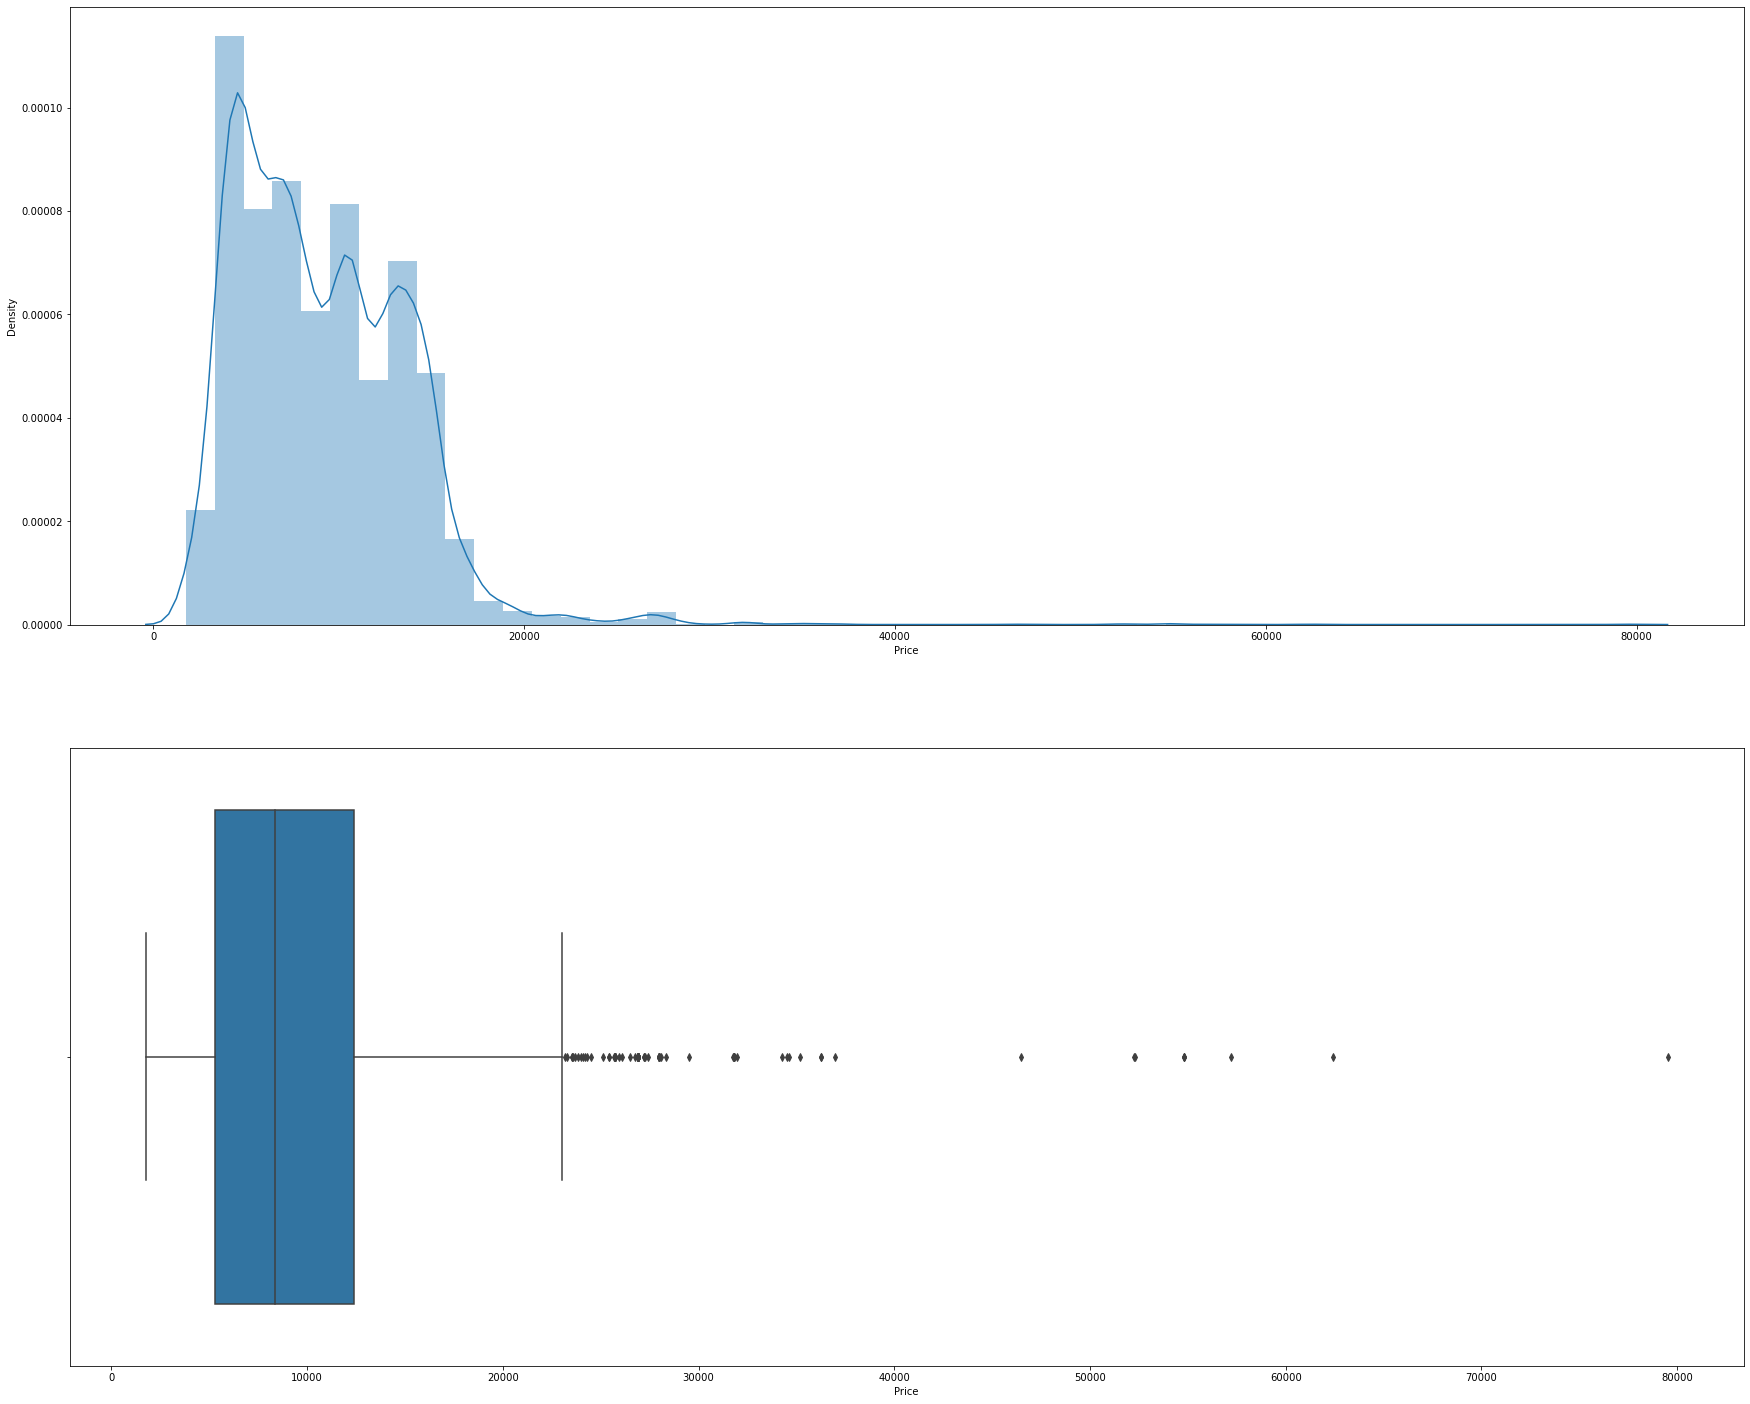

In [80]:
plot(final_df,'Price')

## Handling outliers:

As there is some outliers in price feature,so we replace it with median.

In [81]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

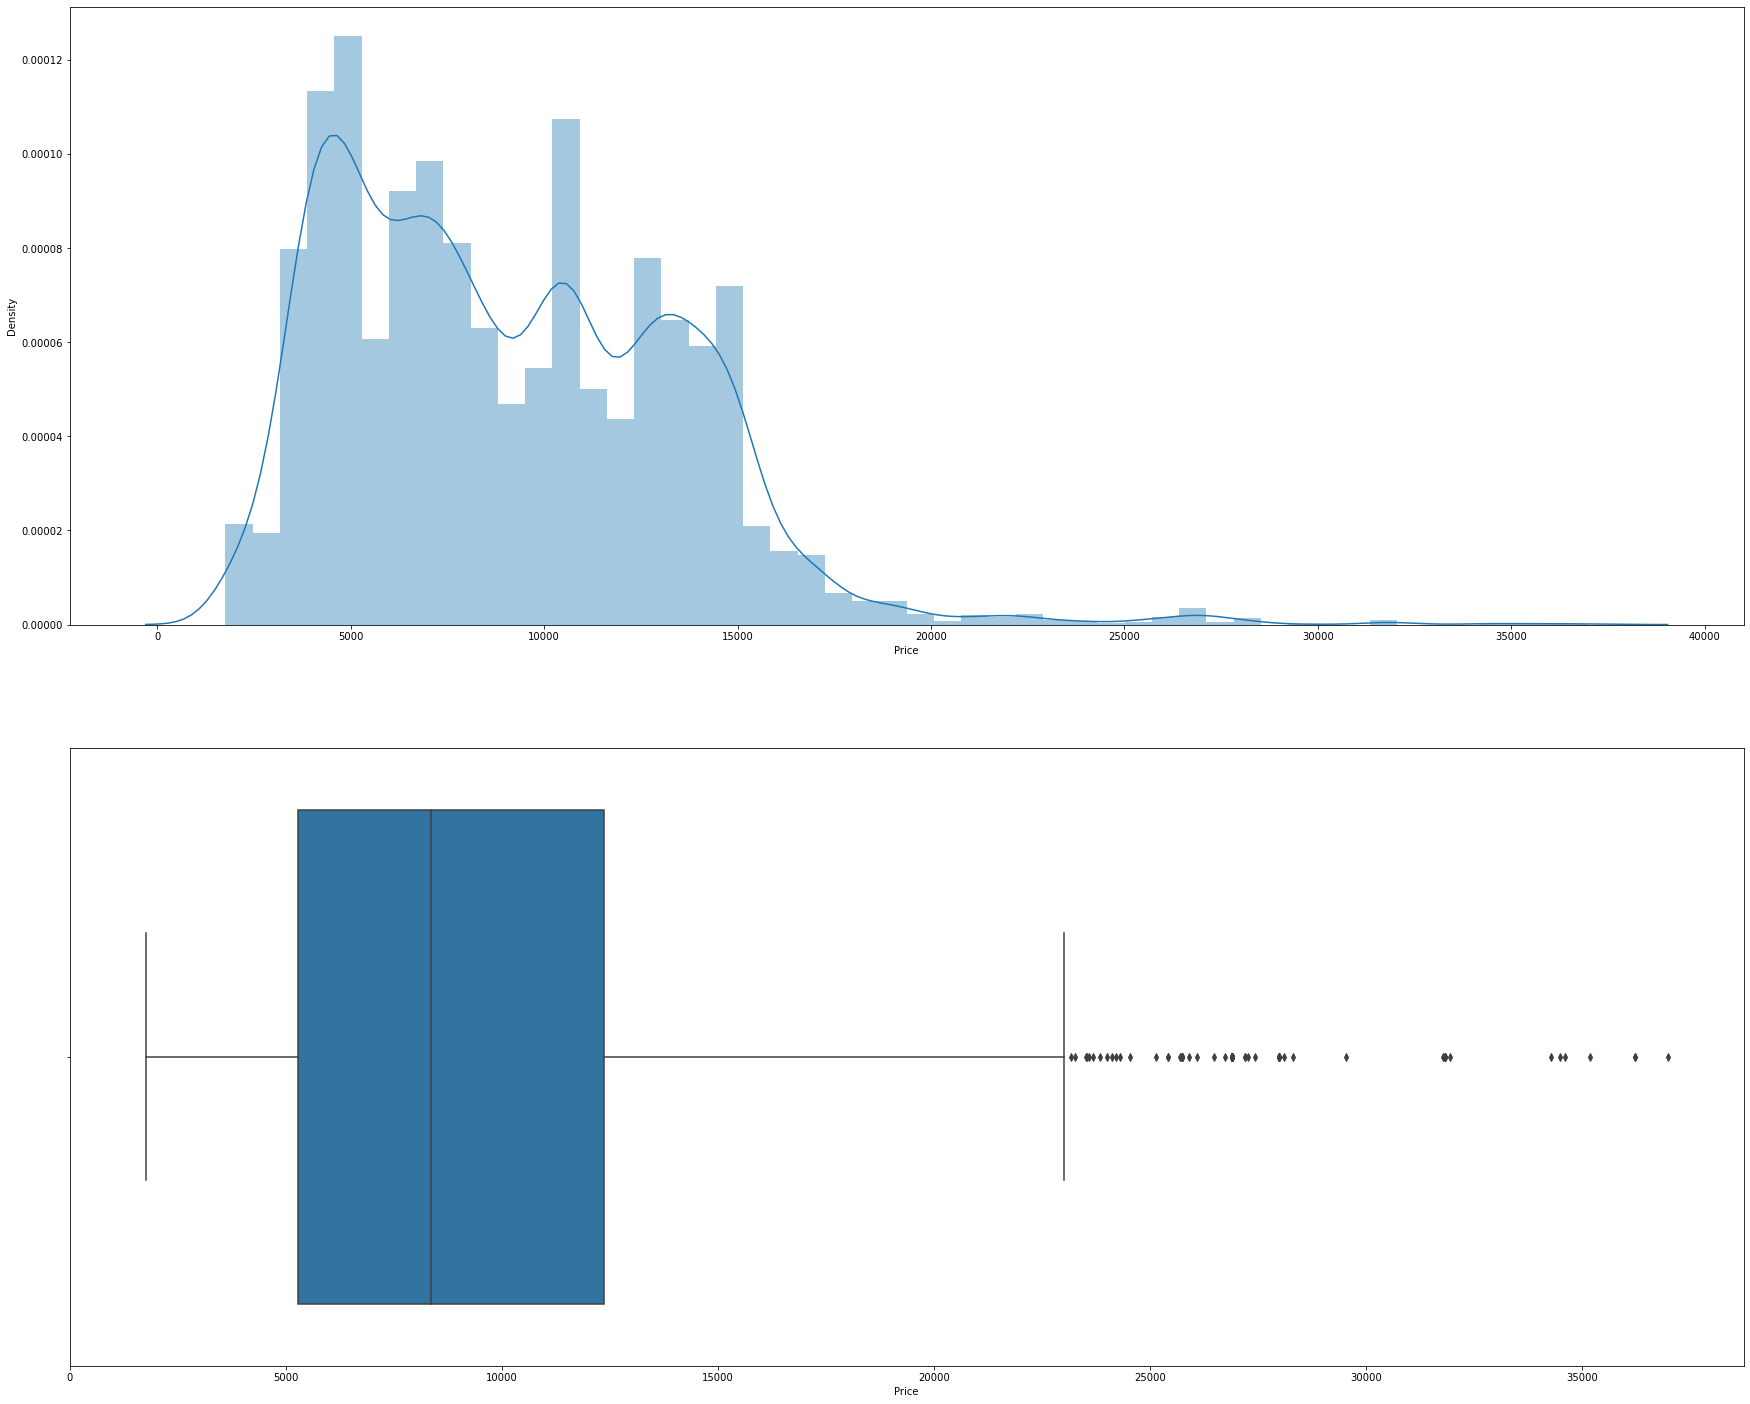

In [82]:
plot(final_df,'Price')

**Seprate the dataset in X and Y columns**

In [83]:
X = final_df.drop('Price',axis=1)
y = df_flight['Price']


## Feature Selection
It is about finding the best feature and having good relation with independent variable
Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [84]:
from sklearn.feature_selection import mutual_info_classif

In [85]:
mutual_info_classif(X,y)

array([2.15810876, 2.05616387, 2.76531574, 2.28378985, 1.46792108,
       0.69938953, 0.76107173, 0.10685677, 0.68068621, 0.9284913 ,
       0.00410714, 0.58320462, 0.00303801, 0.32931754, 0.00869895,
       0.22454614, 0.01915473, 0.18256243, 1.54664565, 0.85683235,
       0.2927804 , 1.53632518, 0.41905025, 0.29605225, 0.17573384,
       0.36871134, 1.05109467, 0.85437258, 1.4290491 , 1.85301453,
       1.23837612, 1.52403795, 1.77897157, 1.77339767])

In [86]:
imp = pd.DataFrame(mutual_info_classif(X,y),index = X.columns)
imp

,0
Total_Stops,2.136584
Route1,2.109858
Route2,2.760320
Route3,2.246927
Route4,1.446614
Route5,0.703741
Air India,0.769286
GoAir,0.083884
IndiGo,0.654923
Jet Airways,0.925658


In [87]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

,importance
Route2,2.760320
Route3,2.246927
Total_Stops,2.136584
Route1,2.109858
Arrival_Time_hour,1.826704
dur_hour,1.805279
dur_min,1.788900
Arrival_Time_min,1.555846
Cochin,1.548762
Delhi,1.545713


As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

<a id='Models'></a>
## MODEL BUILDING

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [89]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.9517040106725172
Predictions are: [ 8538.93       17153.79333333 13829.01283333 ...  3873.58
  5661.56       10701.8775    ]


r2 score is: 0.8379366922770435
MAE:1087.8052442627695
MSE:3120638.7969031814
RMSE:1766.5329877766737


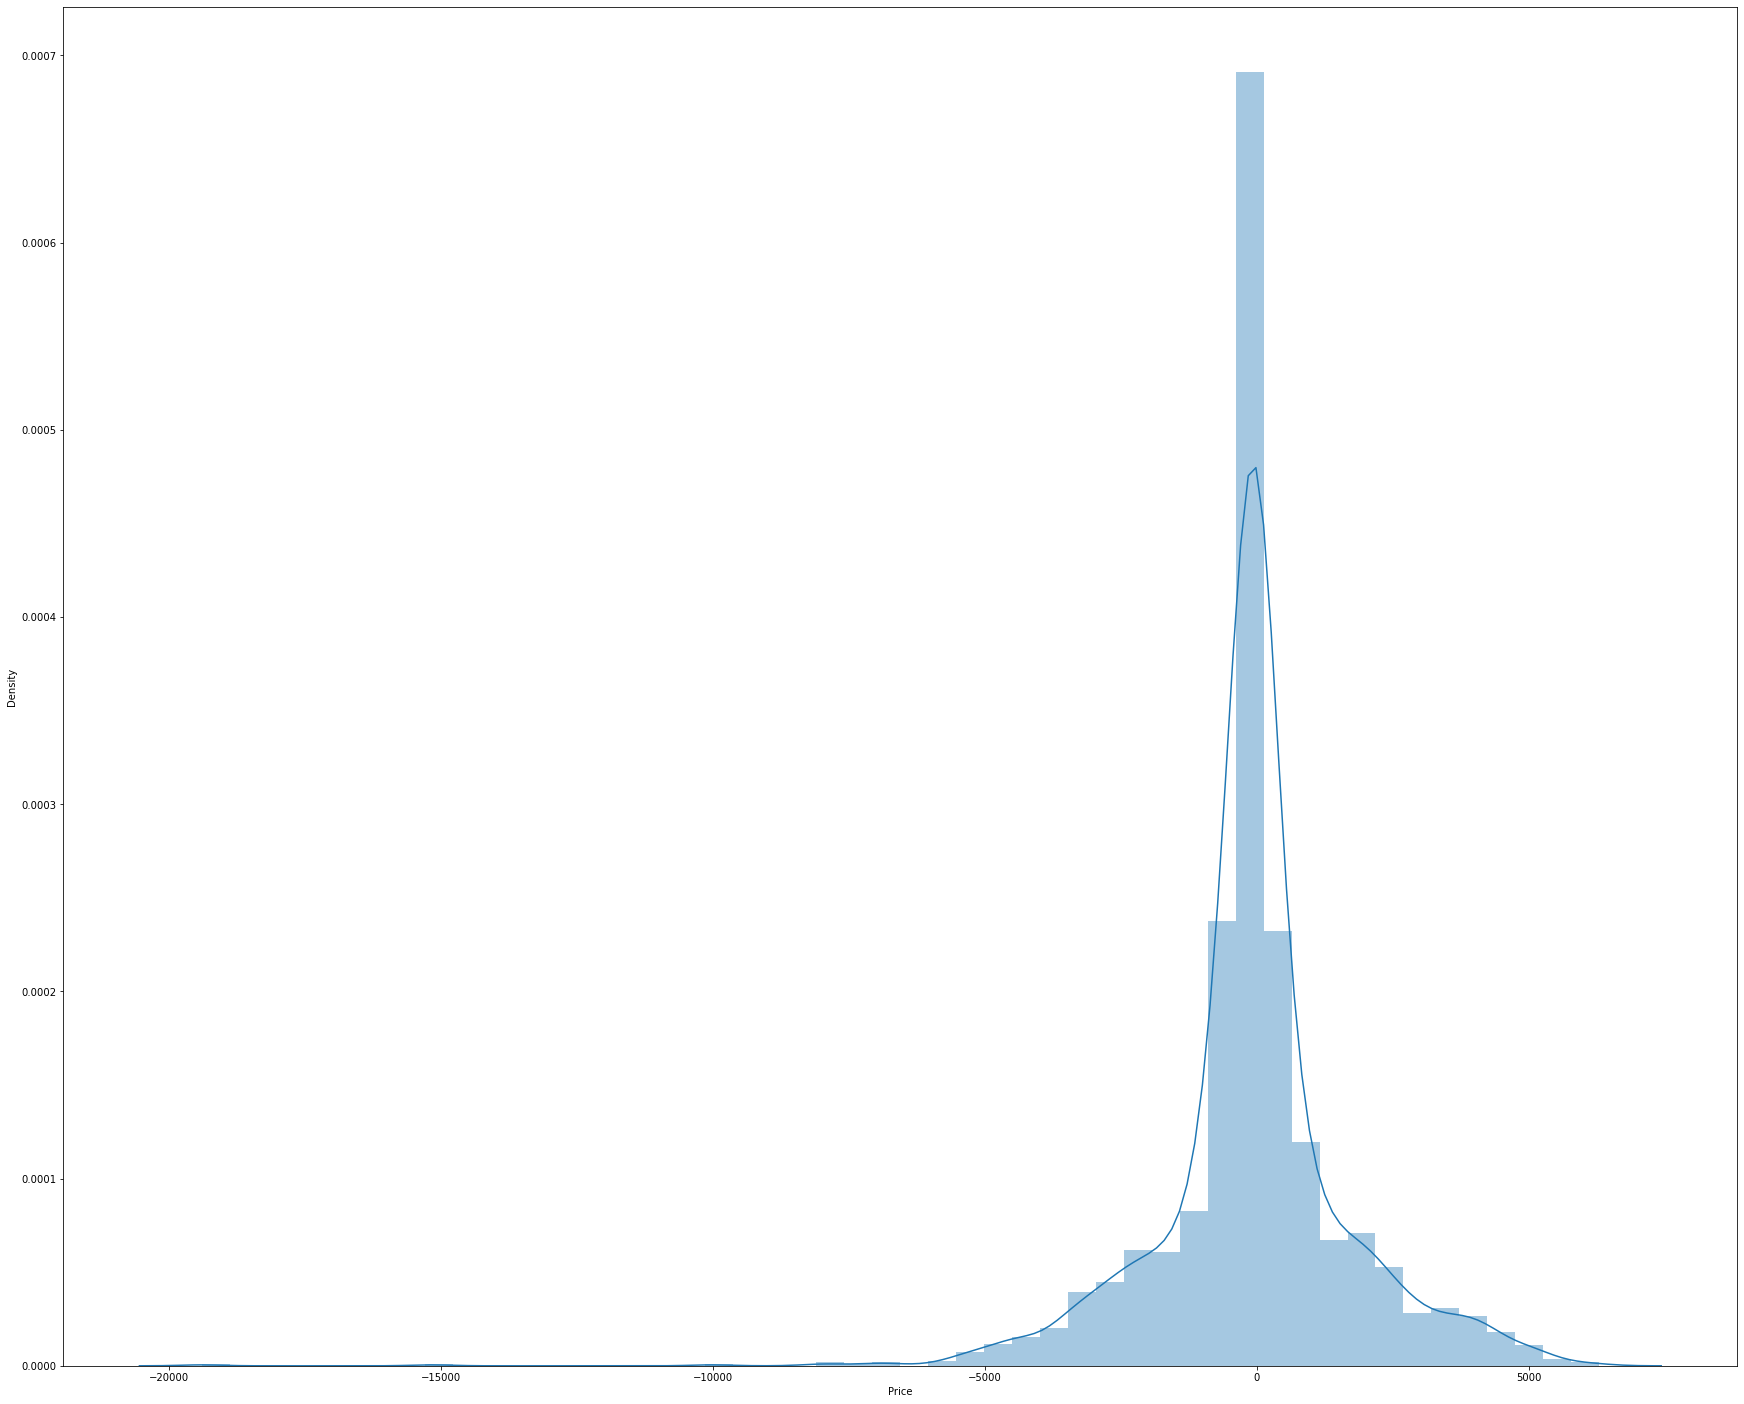

In [91]:
predict(RandomForestRegressor())

In [ ]:
From the graph,it is clear that we predicted 84% correctly

Model is: LogisticRegression()
Training score: 0.34370977179637213
Predictions are: [14571 15135 10844 ...  4226  6147 10262]


r2 score is: 0.4869831836834424
MAE:1840.250818905007
MSE:9878486.394946186
RMSE:3143.0059489199484


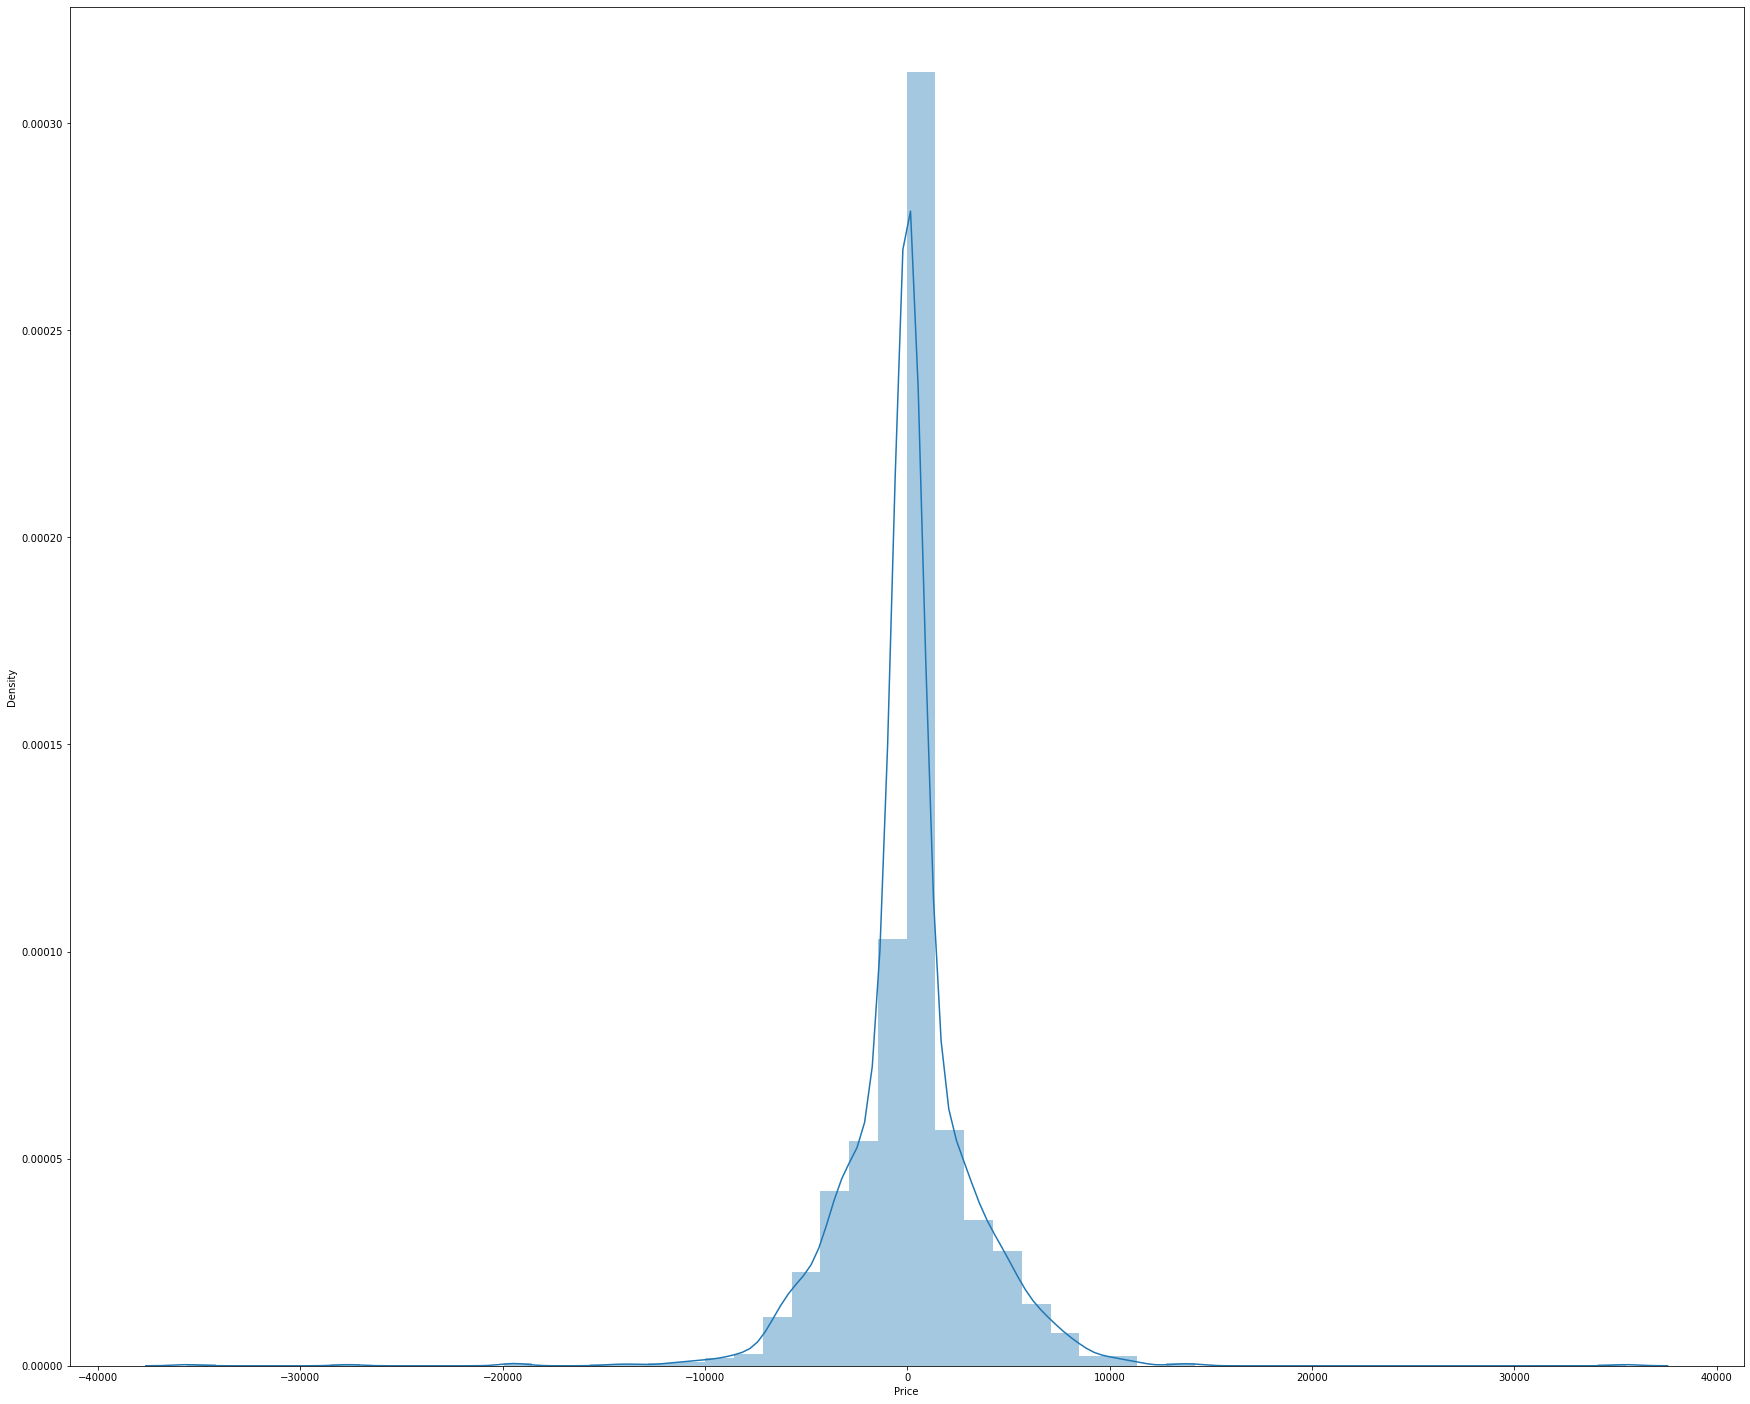

In [92]:
predict(LogisticRegression())

Model is: KNeighborsRegressor()
Training score: 0.7422702398939272
Predictions are: [10009.6 16362.4 12933.2 ...  4583.8  8408.  11232.4]


r2 score is: 0.6685195859514713
MAE:1676.564061768835
MSE:6382879.968497895
RMSE:2526.4362189649464


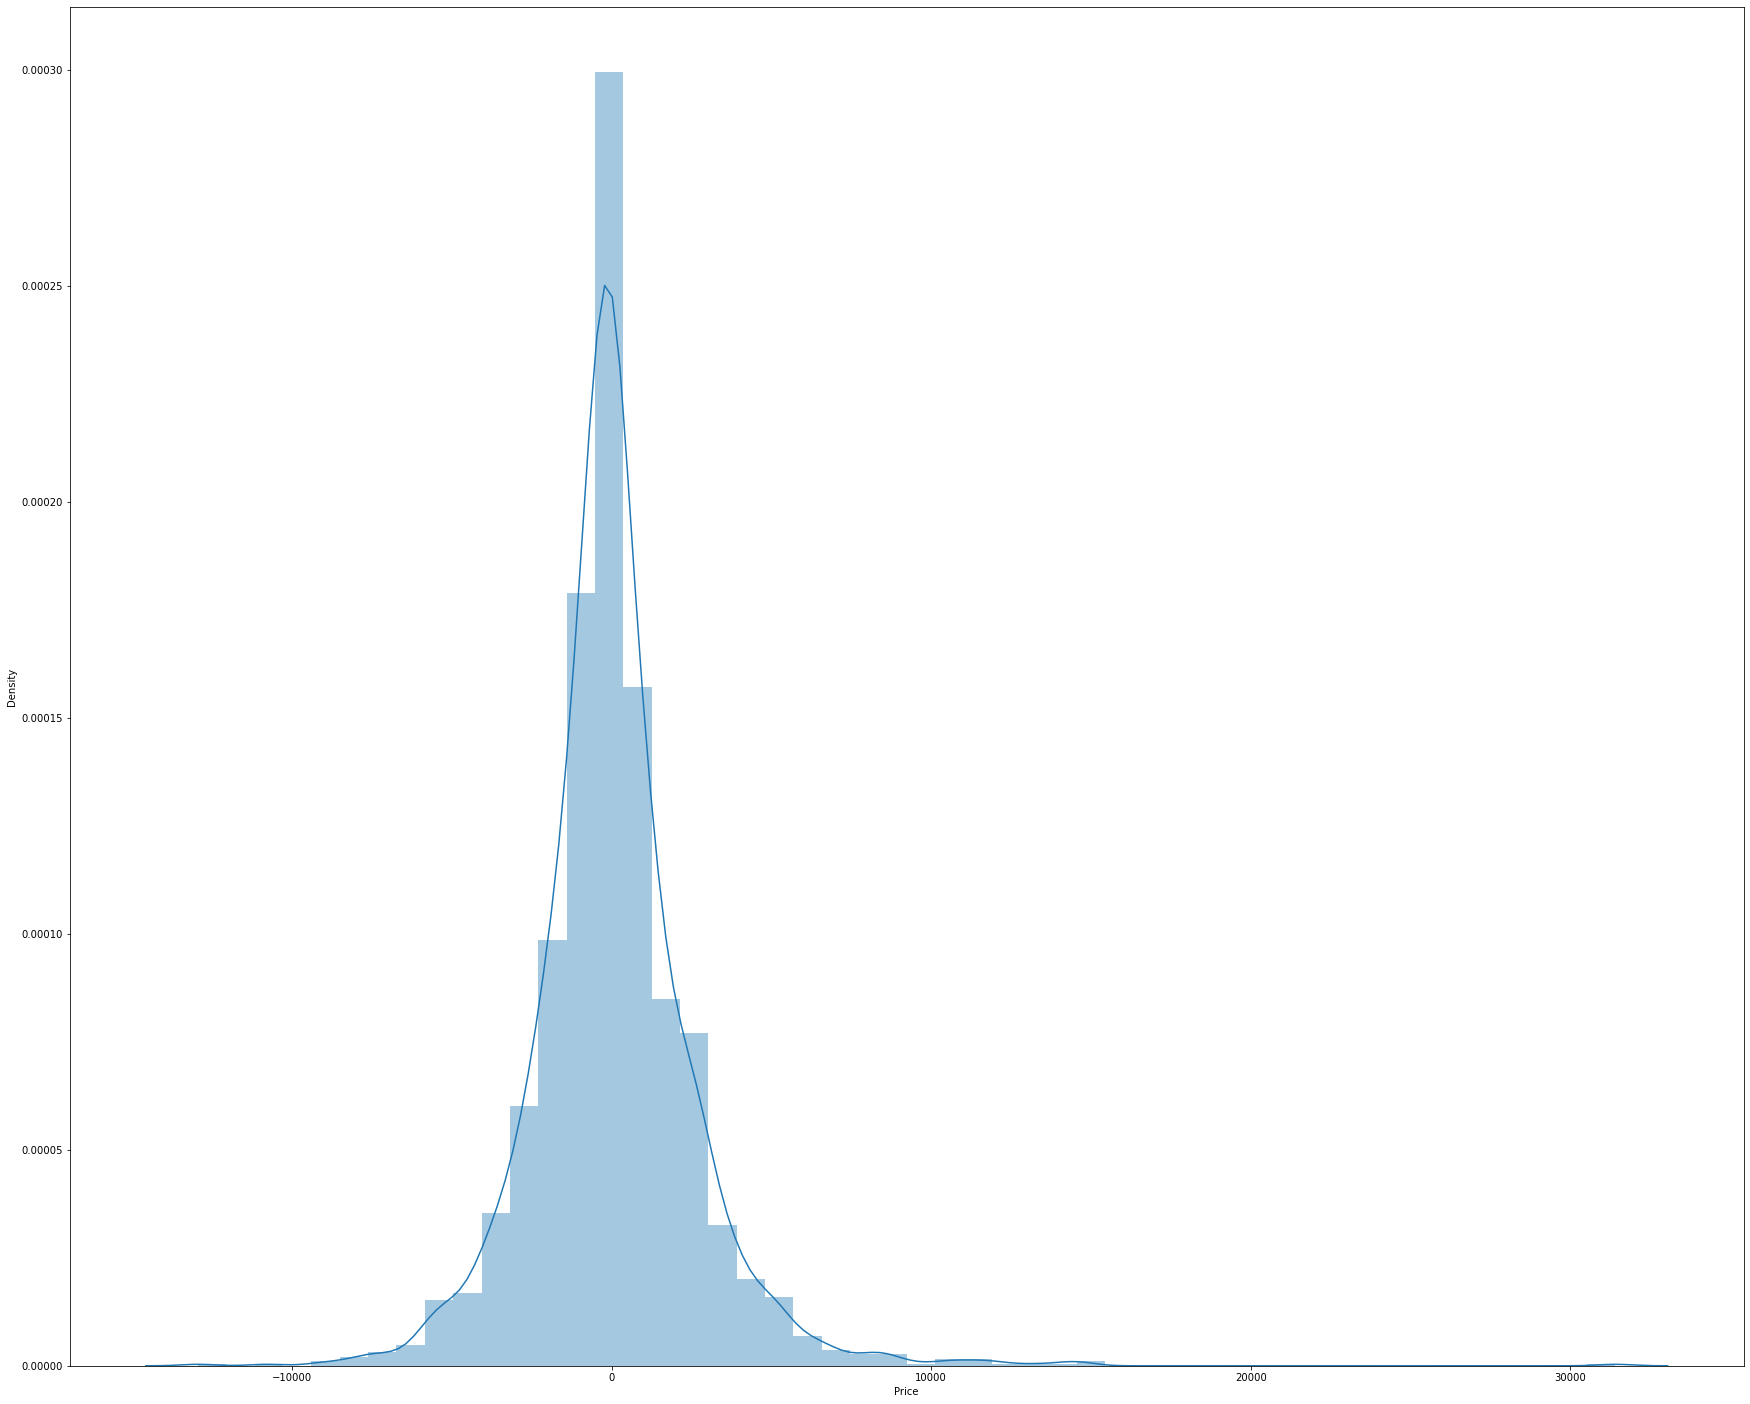

In [93]:
predict(KNeighborsRegressor())

Model is: DecisionTreeRegressor()
Training score: 0.9701124435927416
Predictions are: [ 8996. 18550. 14571. ...  3943.  5054. 10262.]


r2 score is: 0.757678236288626
MAE:1245.7412260177819
MSE:4666069.746425414
RMSE:2160.1087348616074


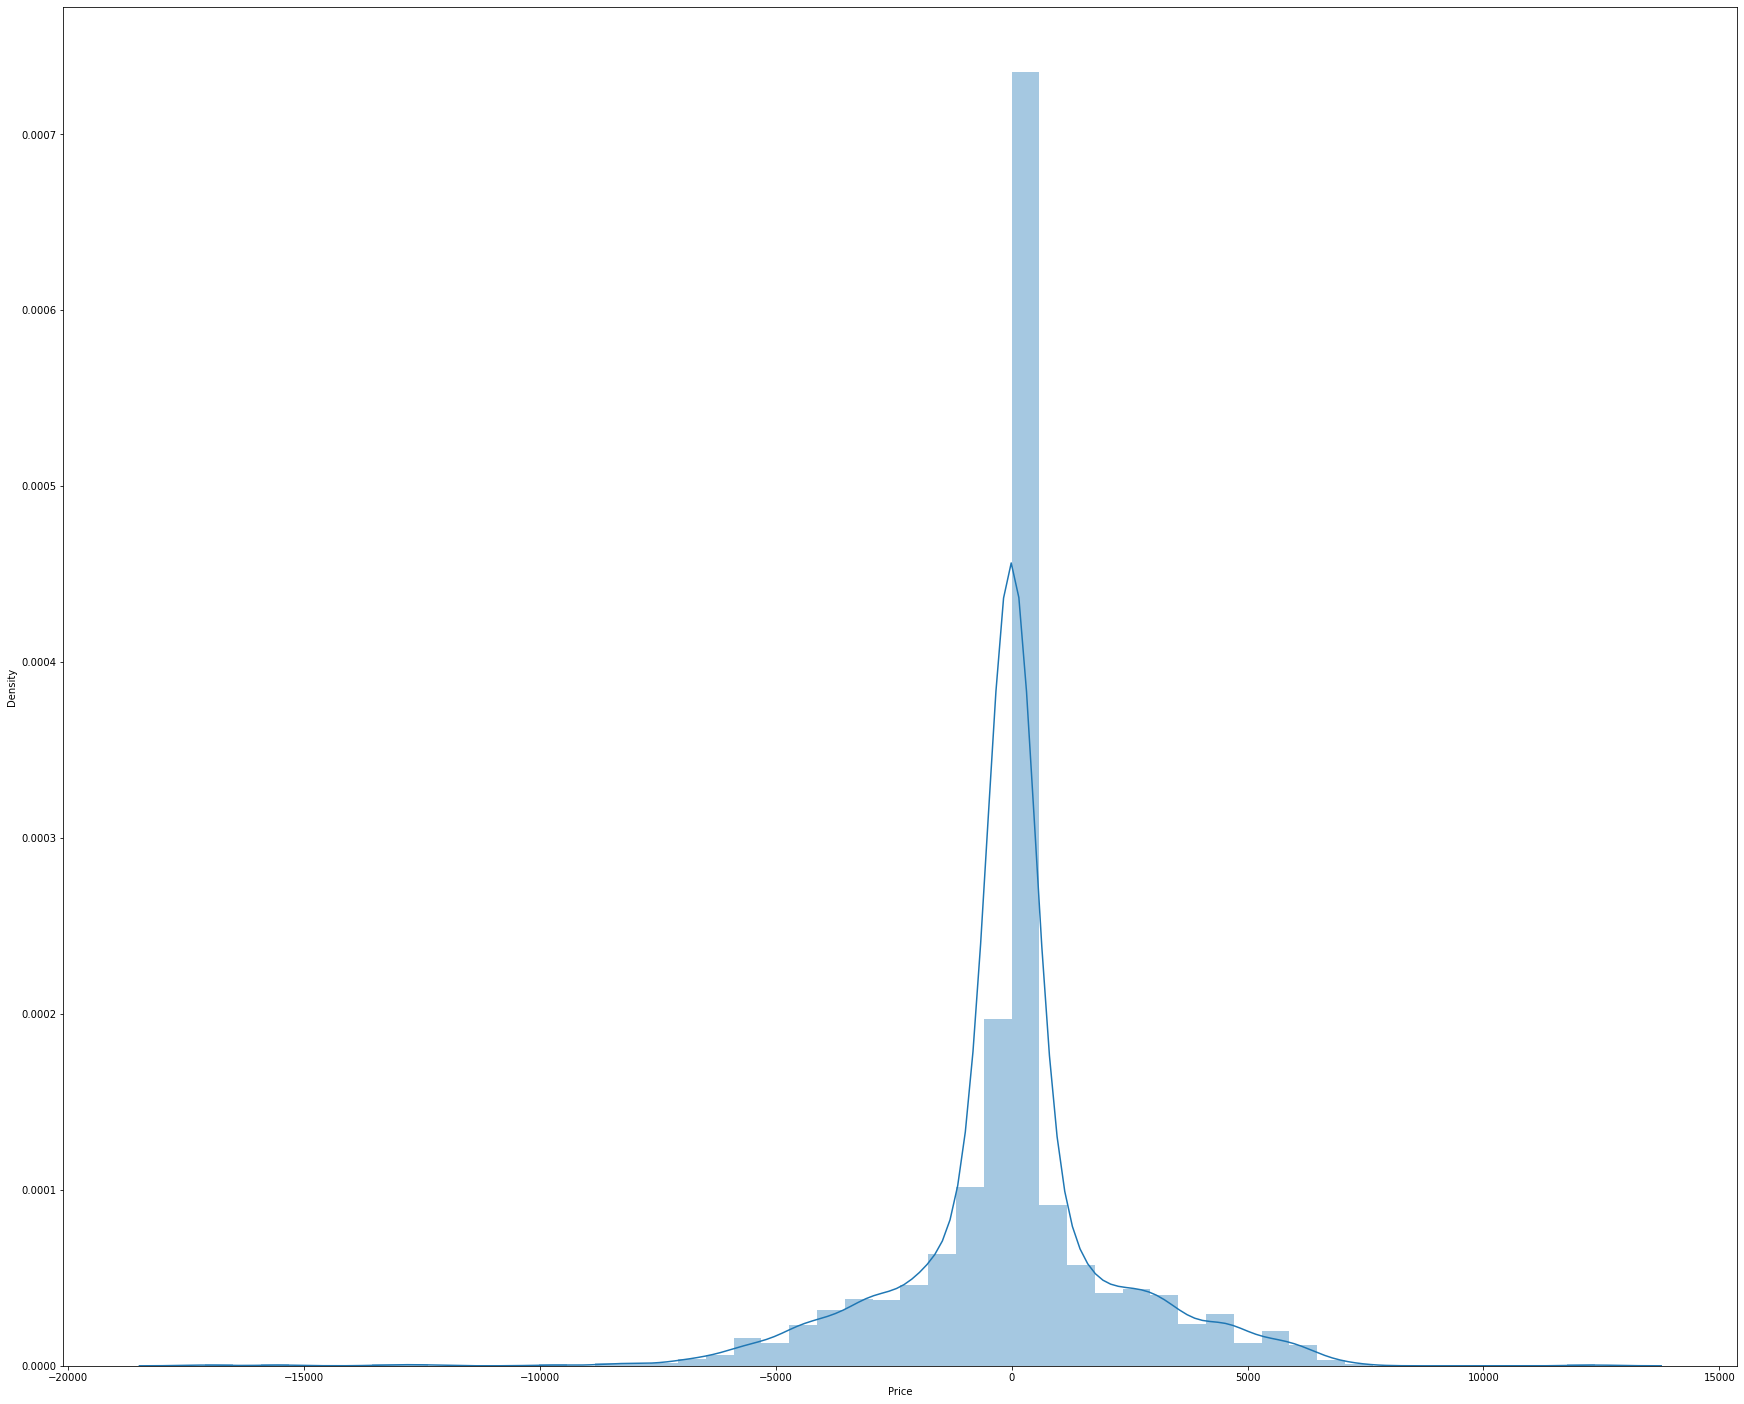

In [94]:
predict(DecisionTreeRegressor())

Model is: SVR()
Training score: 0.06107535742336567
Predictions are: [8392.94951612 8303.96548383 8328.46108722 ... 8167.15354864 8337.38427679
 8611.10770107]


r2 score is: 0.07901285823970194
MAE:3253.9912787716075
MSE:17734231.43343039
RMSE:4211.203086224931


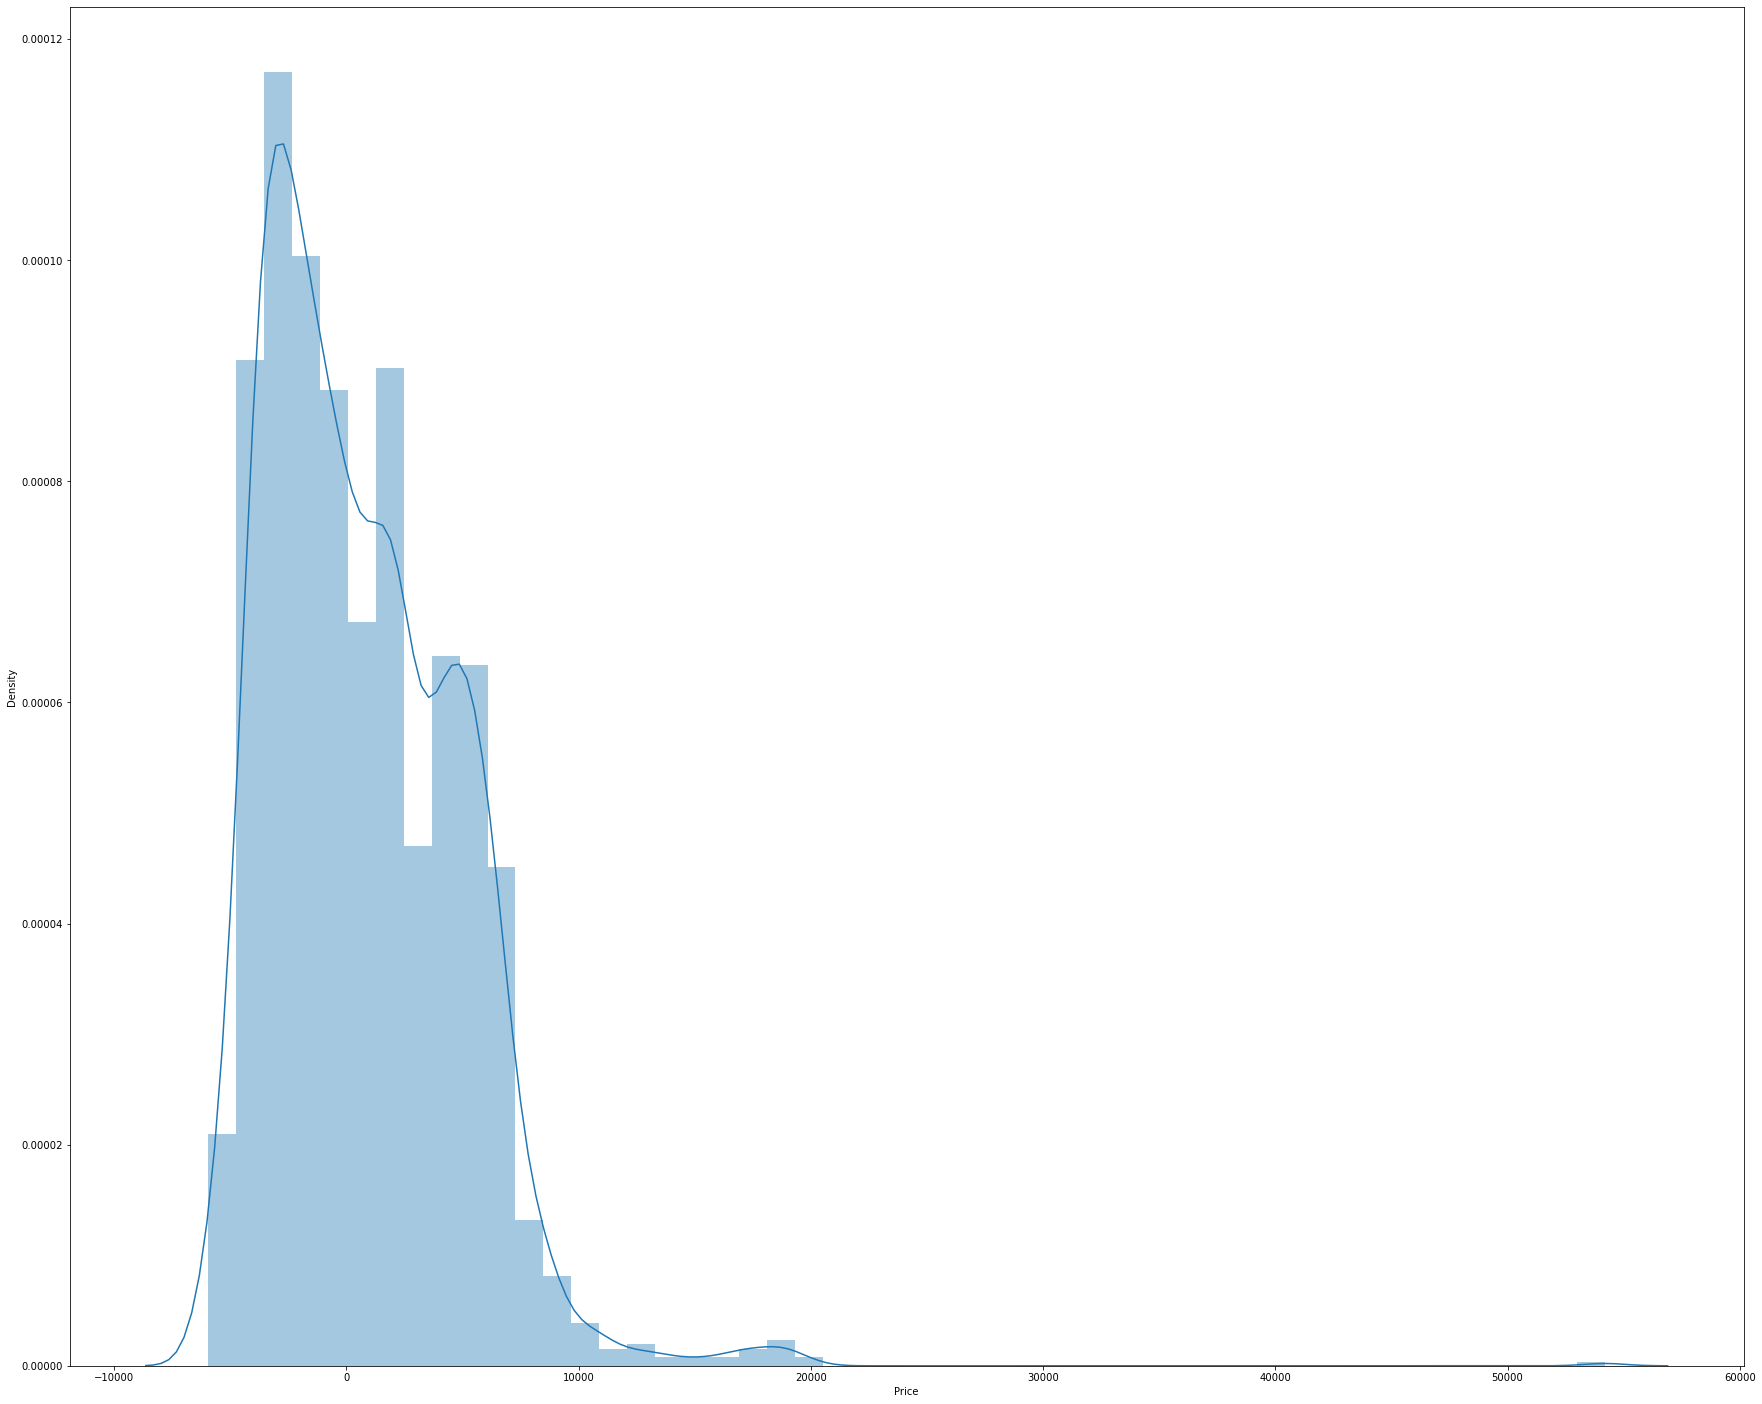

In [95]:
from sklearn.svm import SVR
predict(SVR())

Model is: GradientBoostingRegressor()
Training score: 0.8002136601206639
Predictions are: [ 5771.96330506 17950.18679983 12093.03351169 ...  4398.11610758
  6862.26022232 11477.36403992]


r2 score is: 0.8163170042110446
MAE:1396.6574443439774
MSE:3536940.539127491
RMSE:1880.675553924039


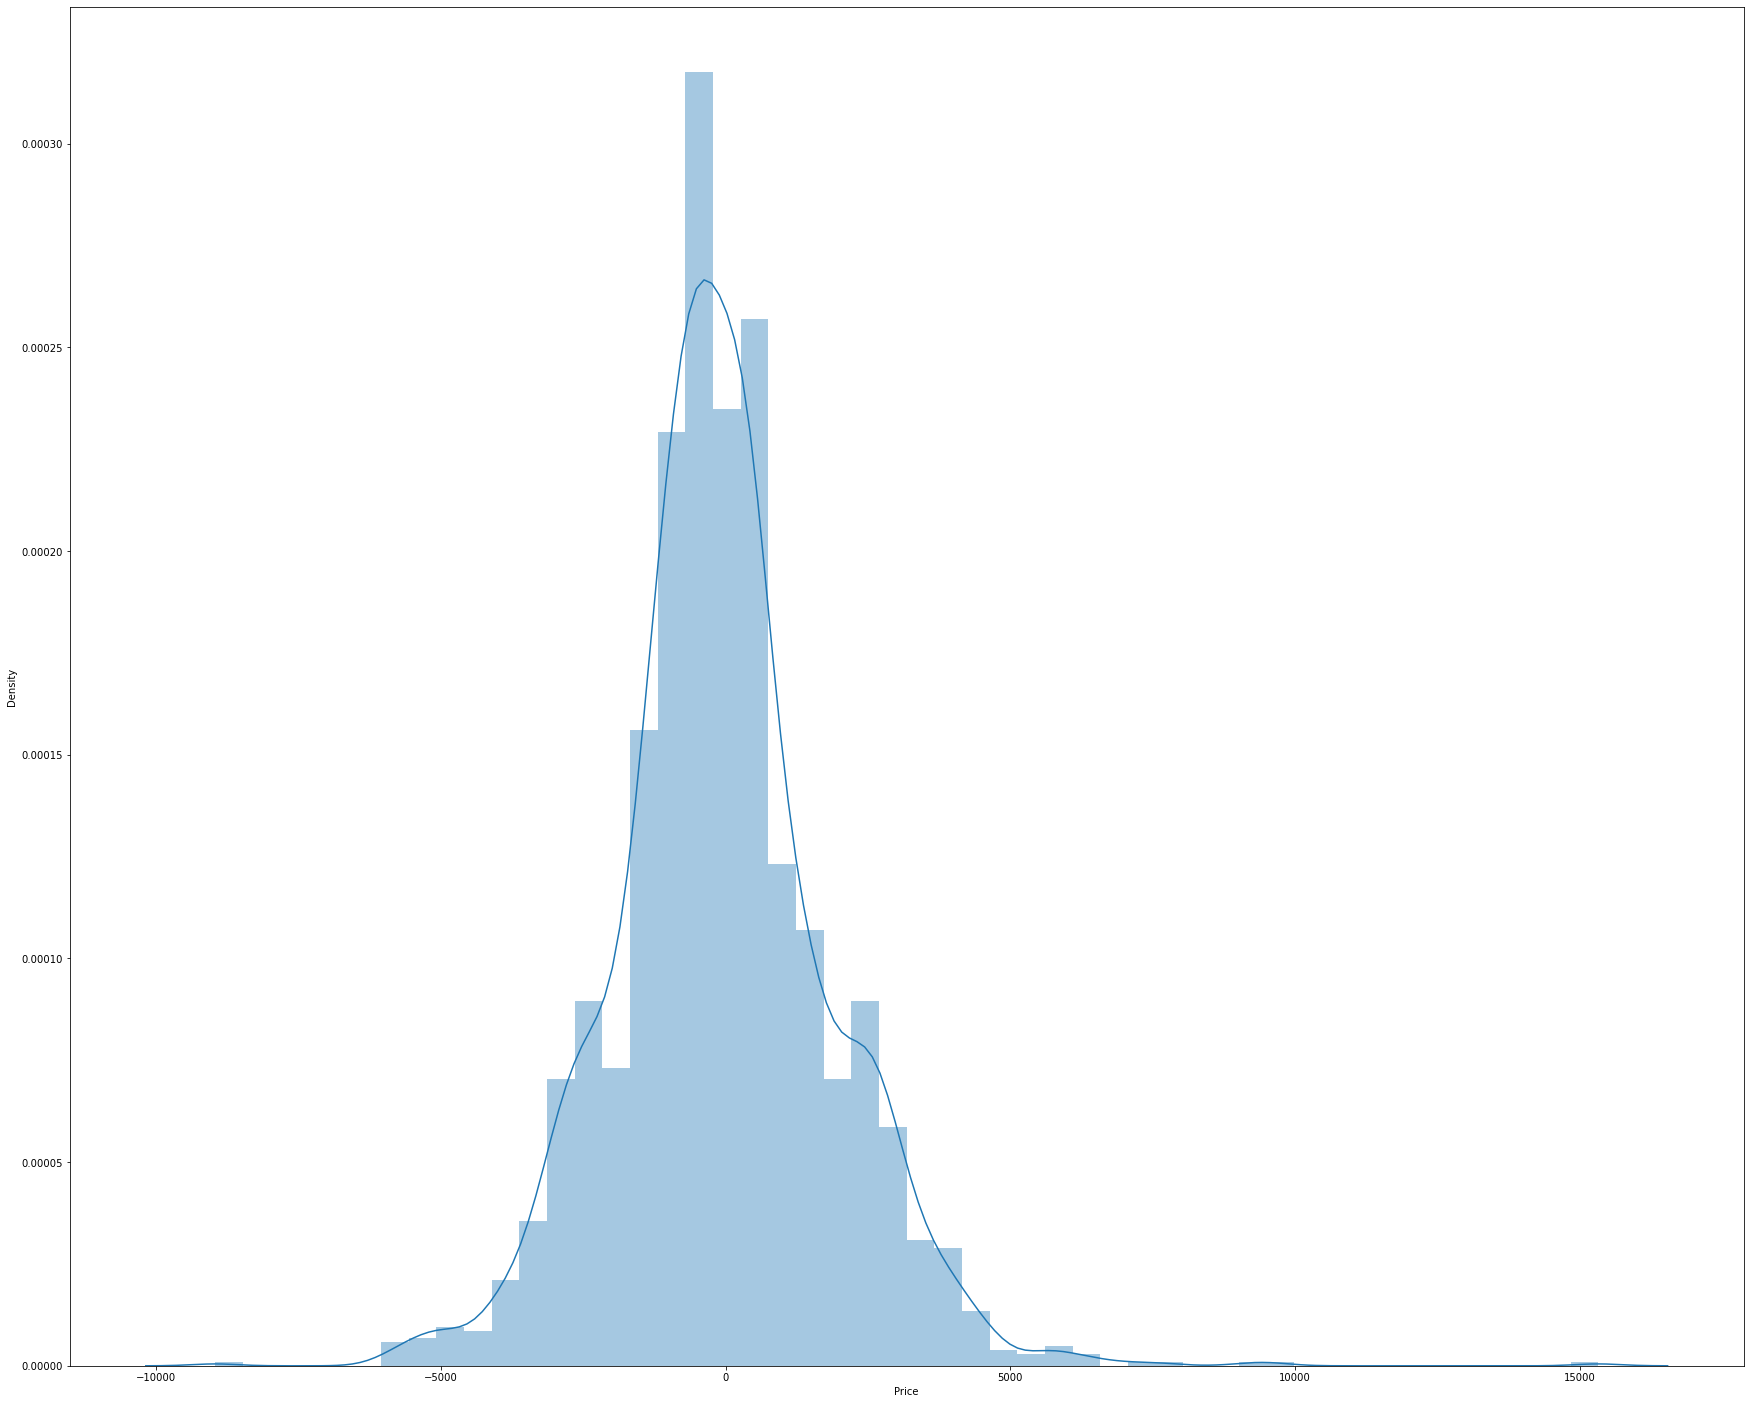

In [96]:
predict(GradientBoostingRegressor())

<a id='Hypertunning'></a>
## Hypertunning the Model

In [97]:
from sklearn.model_selection import RandomizedSearchCV

In [98]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [99]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 15}

In [100]:
# best parameter
rf_random.best_params_

{'n_estimators': 200, 'max_features': 'auto', 'max_depth': 15}

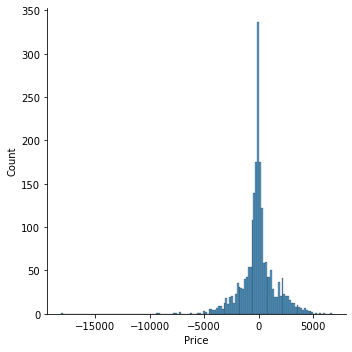

In [101]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [102]:
r2_score(y_test,prediction)

0.8628010824938044

## After hypertuning,the accuracy increases .